## Implementación de Red Neuronal con el uso de un framework o librería

En este proyecto, se planea construir un sistema de recomendación de películas personalizado utilizando una Red Neuronal (NN) basada en el conjunto de datos MovieLens.

El objetivo principal de este proyecto es explorar cómo las técnicas de aprendizaje profundo pueden utilizarse para proporcionar a los usuarios recomendaciones de películas altamente personalizadas.

---

**¿Qué película deberías ver a continuación?**

---

El conjunto de datos MovieLens nos proporciona una amplia gama de información sobre las calificaciones de los usuarios para diferentes películas. Esta información nos permitirá entrenar una Red Neuronal que pueda predecir las preferencias de los usuarios y ofrecer recomendaciones de películas que se adapten a sus gustos individuales.

*Los datos utilizados en este proyecto provienen de MovieLens: https://grouplens.org/datasets/movielens/100k/, una comunidad en línea que reúne calificaciones y revisiones de películas de usuarios de todo el mundo.


### 1. Importar librerías

In [102]:
# Importamos librerias
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers

from keras.utils import to_categorical

In [2]:
# Introducción al proyecto
resumen = """
Proyecto de Recomendación de Películas
    
Este proyecto utiliza el conjunto de datos MovieLens para implementar un sistema de recomendación de películas.
El objetivo es proporcionar recomendaciones personalizadas a los usuarios ya existentes basadas en sus preferencias, 
características personales y patrones de calificación. \n
"""
print(resumen)
print("-----------* Librerias importadas con éxito \n")


Proyecto de Recomendación de Películas
    
Este proyecto utiliza el conjunto de datos MovieLens para implementar un sistema de recomendación de películas.
El objetivo es proporcionar recomendaciones personalizadas a los usuarios ya existentes basadas en sus preferencias, 
características personales y patrones de calificación. 


-----------* Librerias importadas con éxito 



### 2. Definir funciones

In [145]:
       # Función para obtener el nombre del género para un 'movie_id'
def obtener_genre_name(movie_id):
              # Buscamos el movie_id en el dataset data_item y seleccionamos las columnas binarias de cada genre_id
    genres = data_item[data_item['movie_id'] == movie_id].iloc[:, 5:] 
              # Buscamos la columna que tiene el valor máximo (1) y accedemos al nombre de la columna (genre_id)
    genre_id = genres.idxmax(axis=1).values[0]
              # Con el genre_id y el diccionario, obtenemos el genre_name de el movie_id correspondiente
    return genre_mapping[int(genre_id.split('_')[1])]

        #Función para predecir y evaluar modelos multiclase
def evaluar_modelo_multiclase(modelo, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("F1 Score:", f1)
    print("Precisión:", precision)
    print("Recall:", recall)
    print("Exactitud (Accuracy):", accuracy)
    print("\nMatriz de Confusión:")
    print(conf_matrix)

        #Función para predecir y evaluar red neuronal
def evaluar_modelo_nn(modelo, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # Convierte las predicciones one-hot en clases numéricas
    y_pred_classes = np.argmax(y_pred, axis=1) + 1

    # Convierte las etiquetas one-hot en clases numéricas
    y_test_classes = np.argmax(y_test_one_hot, axis=1) + 1

    # Calcular métricas
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    print("F1 Score:", f1)
    print("Precisión:", precision)
    print("Recall:", recall)
    print("Exactitud (Accuracy):", accuracy)
    print("\nMatriz de Confusión:")
    print(conf_matrix)

        # Función para definir estructura del modelo de red neuronal
def set_nn_model_architecture():
    # Define Model
    model = Sequential(name='my_sequential_model')
    
    # Hidden Layer 1: Fully-connected layer con 64 unidades y función de activación ReLU
    model.add(Dense(units=64, input_shape=X_train_scaled.shape[1:], activation='relu',
                    kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                    bias_initializer='ones',
                    name='hiddenlayer1'))
    
    # Configuración de capas ocultas adicionales
    model.add(Dense(units=128, activation='relu', name='hiddenlayer2'))
    model.add(Dense(units=128, activation='relu', name='hiddenlayer3'))
    # Agrega más capas ocultas según sea necesario
    
    # Capa de salida con activación softmax para clasificación multiclase
    num_classes = 5  # Ajusta esto al número de clases en tus datos
    model.add(Dense(units=num_classes, activation='softmax', name='outputlayer'))
    
    model.summary()
    
    return model

        # Función para trazar las curvas de aprendizaje
def plot_acc_loss(training_history):
    plt.plot(training_history.history['accuracy'])
    plt.plot(training_history.history['val_accuracy'])
    plt.title('Accuracy vs. Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    plt.plot(training_history.history['loss'])
    plt.plot(training_history.history['val_loss'])
    plt.title('Loss vs. Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

print("-----------* Funciones definidas con éxito \n")

-----------* Funciones definidas con éxito 



### 3. Importar datos

In [10]:
# Cargamos los datasets (la carpeta MovieLens debe estar en la misma carpeta que el programa)
    # Leer el archivo u_data en un DataFrame
data_general = pd.read_csv('MovieLens/u_data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

    # Leer el archivo u_genre en un DataFrame
data_genre = pd.read_csv('MovieLens/u_genre', sep='|', names=['genre_name', 'genre_id'])

    # Leer el archivo u_item en un DataFrame
        # Lista de nombres de columnas para el DataFrame
columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)]
data_item = pd.read_csv('MovieLens/u_item', sep='|', names=columns, encoding='latin-1')   

    # Lee el archivo 'u_user' usando '|'
data_user = pd.read_csv('MovieLens/u_user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code']) 

    # Lee el archivo u_info y almacena la información en variables individuales
with open('MovieLens/u_info', 'r') as file:
    lines = file.readlines()
    users_count = int(lines[0].split()[0])
    items_count = int(lines[1].split()[0])
    ratings_count = int(lines[2].split()[0])

print("-----------* Datos importados con éxito \n")

# Muestra la información de u_info
print("Para realizar el proyecto, se tienen los siguientes datos.")
print("- Cantidad de usuarios:", users_count)
print("- Cantidad de películas:", items_count)
print("- Cantidad de calificaciones:", ratings_count)

-----------* Datos importados con éxito 

Para realizar el proyecto, se tienen los siguientes datos.
- Cantidad de usuarios: 943
- Cantidad de películas: 1682
- Cantidad de calificaciones: 100000


### 4. Combinar datos

In [11]:
print("-----------* Combinando datos... \n")

# Fusionar los DataFrames
merged_data = pd.merge(data_general, data_user, on='user_id') # Combinamos las calificaciones con las características del usuario

# Añadimos el género de las peliculas segun su id
       # Crear un diccionario que mapee 'genre_id' a 'genre_name'
genre_mapping = dict(data_genre[['genre_id', 'genre_name']].values)

# Aplicar la función obtener_genre_name para crear la columna 'genre_name'
merged_data['genre_name'] = merged_data['movie_id'].apply(obtener_genre_name)

# Seleccionar las columnas de interés
final_data = merged_data[['user_id', 'movie_id', 'age', 'gender',
       'occupation', 'genre_name', 'rating']] # Quitamos la columna timestamp, zip_code y genre_id

# Mostrar el DataFrame resultante
print("-----------* Datos combinados con éxito \n")

print(final_data)
print("\n Estos son los datos que utilizaremos para entrenar nuestros modelos. \n")

-----------* Combinando datos... 

-----------* Datos combinados con éxito 

       user_id  movie_id  age gender occupation genre_name  rating
0          196       242   49      M     writer     Comedy       3
1          196       393   49      M     writer     Comedy       4
2          196       381   49      M     writer     Comedy       4
3          196       251   49      M     writer     Comedy       3
4          196       655   49      M     writer  Adventure       5
...        ...       ...  ...    ...        ...        ...     ...
99995      941       919   20      M    student  Adventure       5
99996      941       273   20      M    student     Action       3
99997      941         1   20      M    student  Animation       5
99998      941       294   20      M    student     Comedy       4
99999      941      1007   20      M    student     Comedy       4

[100000 rows x 7 columns]

 Estos son los datos que utilizaremos para entrenar nuestros modelos. 



### 5. Dividir datos (Entrenamiento y prueba)


In [12]:
# Definir X y y
X = final_data[['user_id', 'movie_id', 'age', 'gender',
       'occupation', 'genre_name']]
y = final_data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=44)

# Ajustar los datos a los modelos que no manejan cualitativas originales
X_encoded = pd.get_dummies(X, columns=['gender', 'genre_name', 'occupation'], drop_first=True)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size = 0.2, random_state=44)

print("-----------* Datos divididos para entrenamiento y prueba con éxito \n")

-----------* Datos divididos para entrenamiento y prueba con éxito 



### 4. Entrenar modelos

#### *Árbol de decisión*

In [152]:
# Crear el modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    # profundidad máxima de 5 para el árbol de decisión con el propósito de acelerar el tiempo de entrenamiento y prevenir el sobreajuste

print("-----------* Creación del primer modelo con éxito \n")

# Entrenar el modelo en los datos de entrenamiento
decision_tree_model.fit(X_train_encoded, y_train_encoded)

print("-----------* Primer modelo entrenado con éxito \n")

# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del primer modelo: Árbol de decisión \n")
evaluar_modelo_multiclase(decision_tree_model, X_test_encoded, y_test_encoded)

# Despliegue de conclusión
print(""" 
      
Continuaremos explorando otros modelos...""")

-----------* Creación del primer modelo con éxito 

-----------* Primer modelo entrenado con éxito 

Evaluación del primer modelo: Árbol de decisión 

F1 Score: 0.2766897294338014
Precisión: 0.3779273014087032
Recall: 0.3615
Exactitud (Accuracy): 0.3615

Matriz de Confusión:
[[ 112    2  296  784   20]
 [  13    6  576 1651   24]
 [  11   12 1074 4299  111]
 [   3    8  850 5732  231]
 [   2    4  369 3504  306]]
 
      
Continuaremos explorando otros modelos...


#### *Random Forest*

In [153]:
# Crear el modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
print("-----------* Creación del segundo modelo con éxito \n")

# Entrenar el modelo en los datos de entrenamiento
random_forest_model.fit(X_train_encoded, y_train_encoded)

print("-----------* Segundo modelo entrenado con éxito \n")

# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del segundo modelo: Random Forest \n")
evaluar_modelo_multiclase(random_forest_model, X_test_encoded, y_test_encoded)

# Despliegue de conclusión
print(""" 
      
Continuaremos explorando otros modelos...""")


-----------* Creación del segundo modelo con éxito 

-----------* Segundo modelo entrenado con éxito 

Evaluación del segundo modelo: Random Forest 

F1 Score: 0.34555489427746644
Precisión: 0.344092587184264
Recall: 0.34765
Exactitud (Accuracy): 0.34765

Matriz de Confusión:
[[ 292  221  303  274  124]
 [ 194  366  778  655  277]
 [ 256  660 1902 1939  750]
 [ 202  547 1793 2887 1395]
 [ 118  233  776 1552 1506]]
 
      
Continuaremos explorando otros modelos...


#### *K-Nearest Neighbors*

In [93]:
# Escalar las características (si aún no se han escalado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)  # Asumiendo que tienes tus conjuntos de entrenamiento y prueba
X_test_scaled = scaler.transform(X_test_encoded)

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=10) 
print("-----------* Creación del tercer modelo con éxito \n")


# Entrenar el modelo en los datos de entrenamiento
knn_model.fit(X_train_scaled, y_train_encoded)

print("-----------* Tercer modelo entrenado con éxito \n")

# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del tercer modelo: K-Nearest Neighbors \n")
evaluar_modelo_multiclase(knn_model, X_test_scaled, y_test_encoded)

# Despliegue de conclusión
print(""" 
      
Continuaremos explorando otros modelos...""")

-----------* Creación del tercer modelo con éxito 

-----------* Tercer modelo entrenado con éxito 

Evaluación del tercer modelo: K-Nearest Neighbors 

F1 Score: 0.34176416534572446
Precisión: 0.3437180963357277
Recall: 0.3492
Exactitud (Accuracy): 0.3492

Matriz de Confusión:
[[ 272  152  355  333  102]
 [ 108  320  909  744  189]
 [ 179  500 2069 2148  611]
 [ 144  387 2066 3152 1075]
 [  76  159  934 1845 1171]]
 
      
Continuaremos explorando otros modelos...


#### *Red Neuronal*

In [147]:
# Hacemos uso de los datos escalados

# Convierte las etiquetas a formato one-hot
y_train_encoded_adjusted = y_train_encoded - 1 # Resta 1 a tus etiquetas para que estén en el rango de 0 a 4
y_test_encoded_adjusted = y_test_encoded - 1 # Resta 1 a tus etiquetas para que estén en el rango de 0 a 4

y_train_one_hot = to_categorical(y_train_encoded_adjusted, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded_adjusted, num_classes=5)


# Crea tu modelo
model_nn = set_nn_model_architecture()

print("-----------* Creación del cuarto modelo con éxito \n")

# Define el optimizador (puedes cambiarlo según tus necesidades)
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

# Compila el modelo
model_nn.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
training_history = model_nn.fit(X_train_scaled, y_train_one_hot, epochs=800, validation_split=0.15, batch_size=40)

print("-----------* Cuarto modelo entrenado con éxito \n")

Model: "my_sequential_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 64)                2752      
                                                                 
 hiddenlayer2 (Dense)        (None, 128)               8320      
                                                                 
 hiddenlayer3 (Dense)        (None, 128)               16512     
                                                                 


 outputlayer (Dense)         (None, 5)                 645       
                                                                 
Total params: 28,229
Trainable params: 28,229
Non-trainable params: 0
_________________________________________________________________
-----------* Creación del cuarto modelo con éxito 

Epoch 1/800
1700/1700 [==============================] - 1s 612us/step - loss: 1.4570 - accuracy: 0.3429 - val_loss: 1.4381 - val_accuracy: 0.3492
Epoch 2/800
1700/1700 [==============================] - 1s 566us/step - loss: 1.4292 - accuracy: 0.3569 - val_loss: 1.4312 - val_accuracy: 0.3532
Epoch 3/800
1700/1700 [==============================] - 1s 572us/step - loss: 1.4215 - accuracy: 0.3625 - val_loss: 1.4285 - val_accuracy: 0.3560
Epoch 4/800
1700/1700 [==============================] - 1s 555us/step - loss: 1.4158 - accuracy: 0.3630 - val_loss: 1.4247 - val_accuracy: 0.3557
Epoch 5/800
1700/1700 [==============================] - 1s 532us/step - loss: 1.4119 - accu

In [151]:
# Realizar predicciones en el conjunto de prueba y evaluar el modelo
print("Evaluación del cuarto modelo: Red Neuronal \n")
evaluar_modelo_nn(model_nn, X_test_scaled, y_test_one_hot)

Evaluación del cuarto modelo: Red Neuronal 

625/625 [==============================] - 0s 238us/step
F1 Score: 0.33679279386935584
Precisión: 0.3498331558337859
Recall: 0.363
Exactitud (Accuracy): 0.363

Matriz de Confusión:
[[ 265  112  239  496  102]
 [ 124  211  633 1114  188]
 [ 190  279 1421 3038  579]
 [ 127  207 1255 4318  917]
 [  48   90  541 2461 1045]]


### 5. Seleccionar modelo


In [155]:
print("""
Observando las evaluaciones de cada modelo, se selecciona el modelo de...

RED NEURONAL
      
La decisión fue tomado por su capacidad de abordar la complejidad de los datos y el potencial que se le 
ve al modelo para mejorar mediante validación cruzada. Además se toma en cuenta que con 100,000 registros es suficiente
para entrenar una Red Neuronal.
""")
      
print("-----------* Modelo seleccionado con éxito \n")


Observando las evaluaciones de cada modelo, se selecciona el modelo de...

RED NEURONAL
      
La decisión fue tomado por su capacidad de abordar la complejidad de los datos y el potencial que se le 
ve al modelo para mejorar mediante validación cruzada. Además se toma en cuenta que con 100,000 registros es suficiente
para entrenar una Red Neuronal.

-----------* Modelo seleccionado con éxito 



### 6. Análisis del modelo

In [156]:
print("""
Realizaremos un análisis profundo de nuestro modelo de Red Neuronal original. 
Posterior a esto, se mejorará el modelo y se volverá a analizar.
""")


Realizaremos un análisis profundo de nuestro modelo de Red Neuronal original. 
Posterior a esto, se mejorará el modelo y se volverá a analizar.



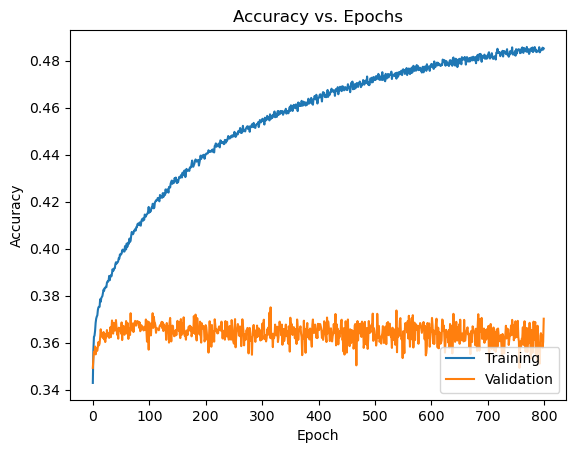

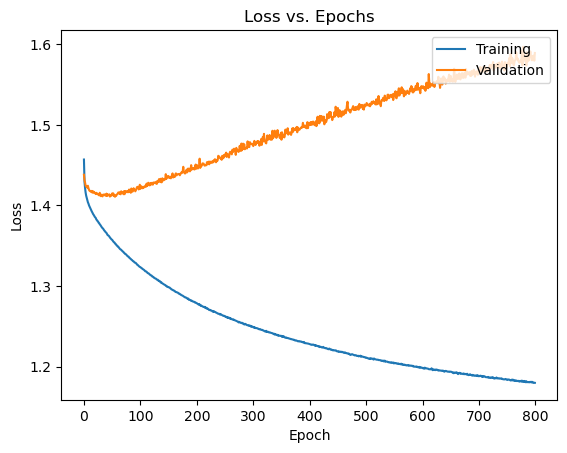

In [157]:
plot_acc_loss(training_history) # Observamos su exactitud y pérdida a lo largo de las epochs

In [161]:
print("\n Análisis del modelo: Red Neuronal Original \n")


 Análisis del modelo: Red Neuronal Original 



### 6. Mejorar modelo

## 5. Realizar predicciones


## 6. Reflexión


In [ ]:
# Empezando con el dataset. Estuve buscando diversas bases de datos que pudieran servirme para realizar este modelo en específico
# me tope con la base de datos utilizada, que contiene las ventas en millones según los millones que se inverten en el tipo de marketing.
# Decidi comenzar mi programa por importar librerías, consecuentemente me propuse a definir las funciones que serían necesarias para
# desarrollar mis modelos de ML (Regresión Lineal Simple). Entre estas funciones se encuentra la atualización de los parametroa w y b, hasta el entrenamiento
# y predicción dados ciertos parámetros. Después de definir mis funciones, separe la base de datos entre los features que ocuparían mis modelos
# para funcionar: TV, Redes Sociales Y Radio. Teniendo esto, se completo el entrenamiento, visualización y predicción con cada modelo.
#
#Cabe aclarar que el tipo de modelo no fue el óptimo para todas las variables. Por ejemplo, para la variable de Millones invertidos en TV, se puede confiar en
# el modelo pues su error es relativamente bajo y al graficar los datos junto con la predicción podemos observar un comportamiento similar y lineal. Por otro
# lado, con las variables de Radio y Redes Socials, el modelo no alcanzó minimzar el error como se esperaba. Es por esto, que a pesar de tener las predicciones
# para estas variables, no sonconfiables los resultados.
#
# Me gustaría en futuras entregas añadir un dataset para la variable de Influencer que también se encuentra en la base de datos original, por cuestiones
# de tiempo, no agregué un modelo para dicha variable pero me parece interesante trabajar con ella puesto que es categórica entonces tendría que hacer algún
# tipo de transformación a dummy, o parecido, para poder trabajar con ella.
#
# En conclusión, aprendí más sobre cómo trabaja la regresión lineal simple y cómo se puede optimizar su entrenamiento. A su vez, el manejo de datos aprendido
# durante las sesiones tomo mucho valor en este proyecto ya que fue una parte principal para el funcionamiento correcto del modelo.